In [1]:
#Importing the Dependencies

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import warnings

In [2]:
#Read data from a CSV file, with encoding specified as "latin-1."

warnings.filterwarnings("ignore")
df=pd.read_csv("spam.csv",encoding="latin-1")

In [3]:
df

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN
...,...,...,...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...,NaN,NaN,NaN
5568,ham,Will Ì_ b going to esplanade fr home?,NaN,NaN,NaN
5569,ham,"Pity, * was in mood for that. So...any other s...",NaN,NaN,NaN
5570,ham,The guy did some bitching but I acted like i'd...,NaN,NaN,NaN


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [5]:
#Removing Unnamed Columns

df=df.drop(columns=["Unnamed: 2","Unnamed: 3","Unnamed: 4"])
df

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will Ì_ b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


In [6]:
df.duplicated().sum()

403

In [7]:
#Removing duplicates from the dataframe

df=df.drop_duplicates(keep="first")
df.duplicated().sum()

0

In [8]:
df.columns=["target","text"]
df.head()

,target,text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [9]:
from sklearn.preprocessing import LabelEncoder
encoder=LabelEncoder()

In [10]:
#Encoding the target column

df.target=encoder.fit_transform(df.target)
df

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,1,This is the 2nd time we have tried 2 contact u...
5568,0,Will Ì_ b going to esplanade fr home?
5569,0,"Pity, * was in mood for that. So...any other s..."
5570,0,The guy did some bitching but I acted like i'd...


In [11]:
df.shape

(5169, 2)

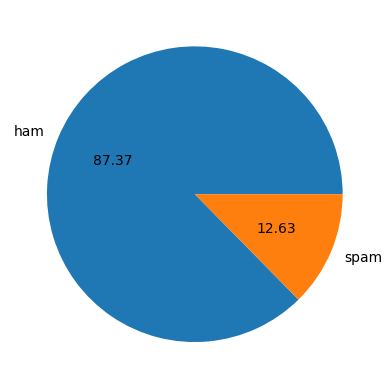

In [12]:
plt.pie(df['target'].value_counts (), labels = ['ham', 'spam'], autopct = "%0.2f")
plt.show()

In [13]:
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
stopwords.words('english')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Uday\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [14]:
import string
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [15]:
from nltk.stem.porter import PorterStemmer
ps=PorterStemmer()
ps.stem('travelling')

'travel'

In [16]:
def transform_text(text):
    text=text.lower()
    text = nltk.word_tokenize(text)
    y = [] 
    for i in text:
         if i.isalnum(): 
            y.append(i)
    text = y[:]
    y.clear()
    for i in text:
        if i not in stopwords.words('english') and i not in string.punctuation: 
            y.append(i)
    text = y[:]
    y.clear()
    for i in text:
        y.append(ps.stem(i))
    return " ".join(y)

In [17]:
df['text'] = df['text'].apply(transform_text)

In [18]:
from wordcloud import WordCloud
wc=WordCloud(width=500,height=500,min_font_size=10, background_color='white')

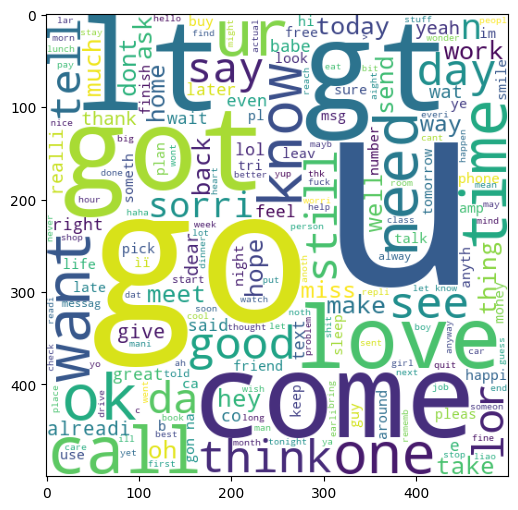

In [19]:
ham_wc = wc.generate (df [df[ 'target']==0]['text'].str.cat (sep=" "))
plt.figure(figsize=(15,6)) 
plt.imshow(ham_wc)

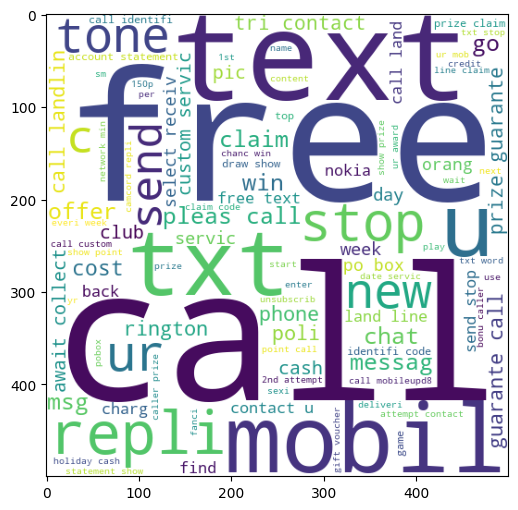

In [20]:
spam_wc = wc.generate(df.loc[df['target'] == 1, 'text'].str.cat(sep=""))
plt.figure(figsize=(15,6)) 
plt.imshow(spam_wc)

In [21]:
df['text']

0       go jurong point crazi avail bugi n great world...
1                                   ok lar joke wif u oni
2       free entri 2 wkli comp win fa cup final tkt 21...
3                     u dun say earli hor u c alreadi say
4                    nah think goe usf live around though
                              ...                        
5567    2nd time tri 2 contact u pound prize 2 claim e...
5568                                b go esplanad fr home
5569                                    piti mood suggest
5570    guy bitch act like interest buy someth els nex...
5571                                       rofl true name
Name: text, Length: 5169, dtype: object

In [22]:
from sklearn.feature_extraction. text import CountVectorizer, TfidfVectorizer
cv = CountVectorizer() 
tfidf=TfidfVectorizer (max_features=3000)

In [23]:
X = tfidf.fit_transform(df['text']).toarray()

In [24]:
X.shape

(5169, 3000)

In [25]:
y=df['target'].values

In [26]:
y

array([0, 0, 1, ..., 0, 0, 0])

In [27]:
#Splitting Training and Test data

from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y, test_size=0.2, random_state=2)

In [28]:
#Navie Bayes Classification

from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score

gnb=GaussianNB()
mnb=MultinomialNB()
bnb=BernoulliNB()

In [29]:
#(1)Gaussian Navie Bayes Classification

gnb.fit(X_train,y_train) 
y_pred1 = gnb.predict(X_test) 
print ('Accuracy Score:' , accuracy_score (y_test,y_pred1)) 
print('Confusion Matrix:\n' , confusion_matrix(y_test,y_pred1)) 
print ('Precision Score:' , precision_score (y_test,y_pred1))

Accuracy Score: 0.8694390715667312
Confusion Matrix:
 [[788 108]
 [ 27 111]]
Precision Score: 0.5068493150684932


In [30]:
#(2)Multinomial Navie Bayes Classification

mnb.fit(X_train, y_train)
y_pred2 = mnb.predict(X_test)
print ('Accuracy Score:' , accuracy_score (y_test,y_pred2)) 
print('Confusion Matrix:\n' , confusion_matrix(y_test,y_pred2)) 
print ('Precision Score:' , precision_score (y_test,y_pred2))

Accuracy Score: 0.9709864603481625
Confusion Matrix:
 [[896   0]
 [ 30 108]]
Precision Score: 1.0


In [31]:
#(3)Bernoulli  Navie Bayes Classification

bnb.fit(X_train,y_train) 
y_pred3= bnb.predict(X_test)
print ('Accuracy Score:' , accuracy_score (y_test,y_pred3)) 
print('Confusion Matrix:\n' , confusion_matrix(y_test,y_pred3)) 
print ('Precision Score:' , precision_score (y_test,y_pred3))

Accuracy Score: 0.9835589941972921
Confusion Matrix:
 [[895   1]
 [ 16 122]]
Precision Score: 0.991869918699187


In [32]:
#(4)Logistic Regression

from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(X_train,y_train) 

LogisticRegression()

In [33]:
prediction_on_training_data = lr.predict(X_train)
accuracy_on_training_data = accuracy_score(y_train, prediction_on_training_data)

prediction_on_test_data = lr.predict(X_test)
accuracy_on_test_data = accuracy_score(y_test, prediction_on_test_data)

print('Accuracy on training data: {} %'.format(accuracy_on_training_data * 100))
print('Accuracy on test data: {} %'.format(accuracy_on_test_data * 100))

Accuracy on training data: 96.54171704957677 %
Accuracy on test data: 95.64796905222437 %
